In [1]:
require(ggplot2)
require(tidyr)
setwd("~/Dropbox (Smithsonian)/Laby_Transcriptomes/Bowtie2_mapping/")

Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: tidyr


In [2]:
coverage316=read.table("316b_coverage.txt")

In [3]:
head(coverage316)

V1,V2,V3
NODE_1_length_34601_cov_13.4373_ID_10242,1,2
NODE_1_length_34601_cov_13.4373_ID_10242,2,3
NODE_1_length_34601_cov_13.4373_ID_10242,3,3
NODE_1_length_34601_cov_13.4373_ID_10242,4,7
NODE_1_length_34601_cov_13.4373_ID_10242,5,9
NODE_1_length_34601_cov_13.4373_ID_10242,6,11


In [4]:
colnames(coverage316)=c("Scaffold", "Position", "Depth")

In [5]:
length(unique(coverage316$Scaffold))

[1] 237

In [6]:
coverage316$continuous=1:NROW(coverage316)

In [7]:
tail(coverage316)

,Scaffold,Position,Depth,continuous
792202,NODE_318_length_136_cov_30.8889_ID_30584,131,3,792202
792203,NODE_318_length_136_cov_30.8889_ID_30584,132,2,792203
792204,NODE_318_length_136_cov_30.8889_ID_30584,133,2,792204
792205,NODE_318_length_136_cov_30.8889_ID_30584,134,1,792205
792206,NODE_318_length_136_cov_30.8889_ID_30584,135,1,792206
792207,NODE_318_length_136_cov_30.8889_ID_30584,136,1,792207


In [8]:
positive=(coverage316[coverage316$Depth!=0,])

In [9]:
mean(positive$Depth)

[1] 423.0381

In [10]:
NROW(coverage316)

[1] 792207

In [11]:
mean()

ERROR: Error in mean.default(): argument "x" is missing, with no default


In [12]:
(1-296513/792207)*100

[1] 62.57127

In [13]:
coverage316$posneg=ifelse(coverage316$Depth>0,1,0)

In [14]:
percent=function(x) {
    100*sum(x/NROW(x))
}

In [19]:
perscaf=as.data.frame(aggregate(posneg~Scaffold, data=coverage316, FUN=percent))

In [20]:
perscaf 

Scaffold,posneg
NODE_1_length_34601_cov_13.4373_ID_10242,54.53022
NODE_10_length_11098_cov_20.6514_ID_8802,76.66246
NODE_100_length_3245_cov_9.28223_ID_9940,58.79815
NODE_101_length_3178_cov_7.86693_ID_8724,97.92322
NODE_102_length_3178_cov_13.022_ID_9248,65.44997
NODE_103_length_3165_cov_16.05_ID_30769,66.35071


In [21]:
perscaf[perscaf$posneg==0,]

Scaffold,posneg


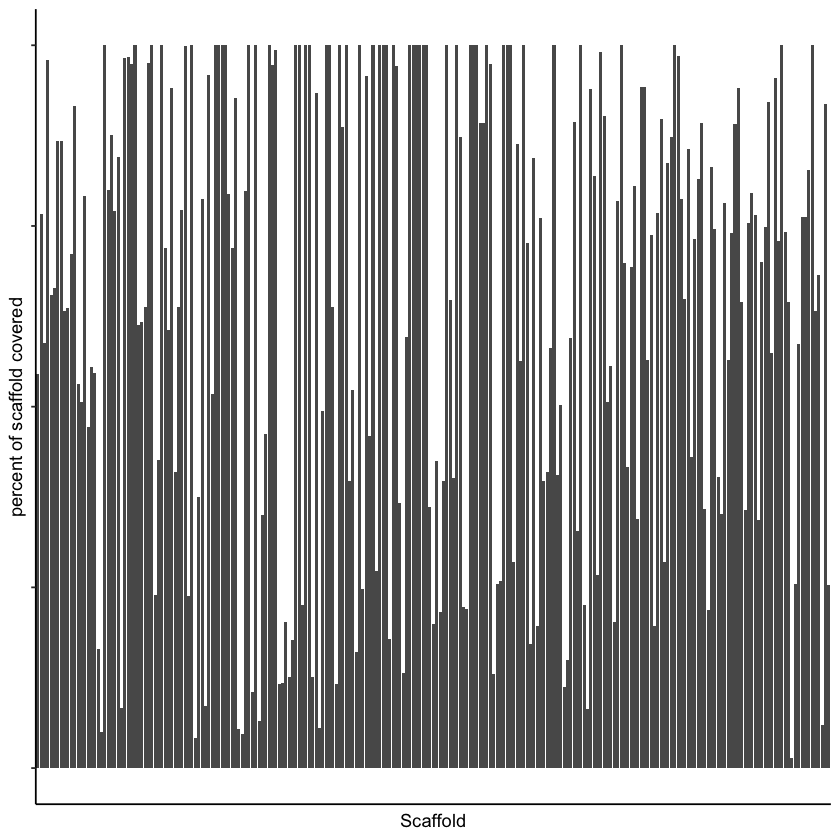

In [17]:
ggplot(perscaf, aes(x = Scaffold, y = posneg))+
       geom_bar(stat="identity", position="dodge")+
#scale_color_manual(values = rep(c("lightgrey", "darkgrey"), 237 )) +
#geom_line()+
theme_bw()+
theme(legend.position="none", panel.border = element_blank(), 
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_blank()) +
          ylab("percent of scaffold covered")

In [ ]:
plot(coverage316$Depth)